In [476]:
from zomathon import ZomatoAPI
import pandas as pd
import folium
import jovian

In [189]:
zom = ZomatoAPI('3943f8d142f7132a1c68e94b872649b2') #enter your API key

name = [] #store the name 
location=[]  #Store the location 
lat=[]  #store the latitude
lng=[]   #store the longitude
avg_cost_2=[]  #store the average cost
price_rnge=[]  #store the price range
rating=[]    #store the rating

for x in range(0,100,20):
    res = zom.search(city_id=259,start=x,count=20,cuisines=148,category=10)  
    for a in res['restaurants']:
        name.append(a['restaurant']['name'])
        location.append(a['restaurant']['location']['address'])
        lat.append(a['restaurant']['location']['latitude'])
        lng.append(a['restaurant']['location']['longitude'])
        avg_cost_2.append(a['restaurant']['average_cost_for_two'])
        price_rnge.append(a['restaurant']['price_range'])
        rating.append(a['restaurant']['user_rating']['aggregate_rating'])
    
col = {'Name':name,'Location':location,'Latitude':lat,'Longitude':lng,'Average cost for 2':avg_cost_2,'Price range':price_rnge,'Rating':rating}    
df= pd.DataFrame(col)    

In [190]:
df

,Name,Location,Latitude,Longitude,Average cost for 2,Price range,Rating
0,Delhi Streets,"The Archway, 22 Katherine Place, CBD, Melbourne",-37.8198703504,144.9564782158,60,3,4.4
1,Aangan Indian Restaurant,"559 Barkly Street, West Footscray, Melbourne",-37.7974247084,144.8766952381,80,3,4.5
2,Red Pepper,"14-16 Bourke Street, CBD, Melbourne",-37.8114940309,144.9725718051,70,3,4.4
3,Crossways Food For Life,"The Walk Arcade, Shop 9-11, 309-325 Bourke Street",-37.8144579661,144.9642938376,25,1,4.5
4,Horn Please,"167 St Georges Road, Fitzroy North, Melbourne",-37.7851948224,144.9820993468,70,3,4.4
...,...,...,...,...,...,...,...
95,Golden Saffron,"75 Point Cook Road, Seabrook, Melbourne",-37.8772497732,144.7586089745,50,3,4.1
96,Anshumann Da Dhaba,"628 Glen Huntly Road, Caulfield, Melbourne",-37.8861975971,145.0155679509,40,2,3.7
97,Le Taj,"74 Rosslyn Street, West Melbourne, Melbourne",-37.8078216587,144.9520291016,70,3,3.9
98,Saleem Indian Restaurant,"114 Bell Street, Coburg, Melbourne",-37.7411739122,144.9654857442,55,3,4.0


In [191]:
df.sort_values('Rating', ascending=False)

,Name,Location,Latitude,Longitude,Average cost for 2,Price range,Rating
3,Crossways Food For Life,"The Walk Arcade, Shop 9-11, 309-325 Bourke Street",-37.8144579661,144.9642938376,25,1,4.5
24,Machan Indian Restaurant,"Shop 2-3/953 Main Road, Eltham, Melbourne",-37.7140086497,145.1481663063,60,3,4.5
1,Aangan Indian Restaurant,"559 Barkly Street, West Footscray, Melbourne",-37.7974247084,144.8766952381,80,3,4.5
12,Tantra,"256 Blackburn Road, Doncaster East, Melbourne",-37.7824761474,145.1635139063,60,3,4.5
0,Delhi Streets,"The Archway, 22 Katherine Place, CBD, Melbourne",-37.8198703504,144.9564782158,60,3,4.4
...,...,...,...,...,...,...,...
73,Raju Omlet Centre,"424 Burwood Road, Hawthorn, Melbourne",-37.8231024947,145.0386014208,30,2,3.7
57,BonFire Cafe,"1/27 Springvale Road, Springvale, Melbourne",-37.9354249085,145.1558146253,60,3,3.7
63,Mrs Singh,"88 Flinders Lane, CBD, Melbourne",-37.8151829069,144.9712531641,160,4,3.6
89,Aangan Express,"361 Burwood Road, Hawthorn, Melbourne",-37.8226080420,145.0359829143,60,3,3.6


In [472]:
#calculating mean
df["Average cost for 2"].mean()

59.8

In [470]:
#removing outliers and calculating mean
df[df['Average cost for 2']<=100]['Average cost for 2'].mean()

57.68041237113402

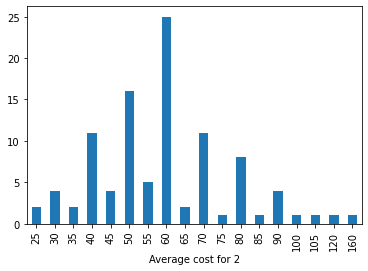

In [193]:
df.groupby('Average cost for 2')['Average cost for 2'].count().plot.bar()

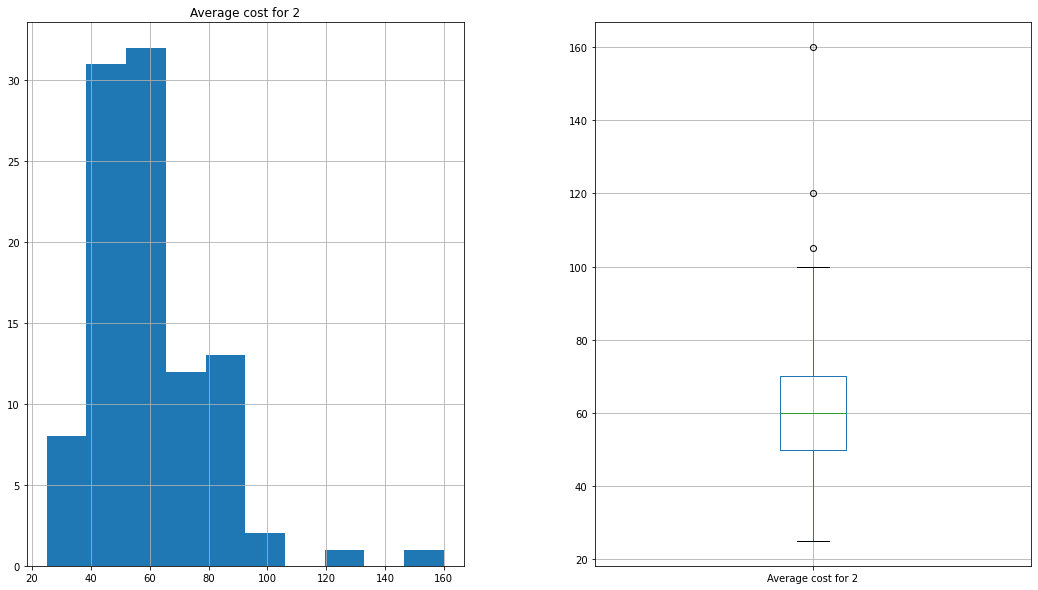

In [384]:
#plotting the data
fig, axs = plt.subplots(1,2,figsize=(18,10))
df.hist('Average cost for 2',ax=axs[0])
df.boxplot(column = 'Average cost for 2',ax=axs[1])

In [466]:
mel_map = folium.Map([-37.840935, 144.946457], zoom_start=10)
mel_map

In [469]:
for index, row in df.iterrows():
    if row['Average cost for 2']<=59.8:
        folium.Marker([row['Latitude'], row['Longitude']],
                      popup=row['Name']+","+" "+"Rating="+str(row['Rating']),
                      tooltip=row['Location'],
                      icon=folium.Icon(color='green')
                     ).add_to(mel_map)
    else:
        folium.Marker([row['Latitude'], row['Longitude']],
                      popup=row['Name']+","+" "+"Rating="+str(row['Rating']),
                      tooltip=row['Location'],
                      icon=folium.Icon(color='red')
                     ).add_to(mel_map)
      
mel_map    

In [200]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [298]:
#latitude and longitude for the centre of CBD
cbd_lat,cbd_lng =  -37.81239161656876, 144.96227284082644

In [299]:
#calculating haversine distance and storing in a new column
for index,row in df.iterrows():
    res_lat = float(row['Latitude'])
    res_lng = float(row['Longitude'])
    distance_from_cbd = haversine(cbd_lng,cbd_lat,res_lng,res_lat)
    df.loc[index,'Distance from CBD']=distance_from_cbd

In [300]:
df.sort_values('Distance from CBD', ascending=False)

,Name,Location,Latitude,Longitude,Average cost for 2,Price range,Rating,Distance from CBD
91,The Spice Club,"506 Nepean Highway, Frankston, Melbourne",-38.1447287014,145.1201868430,65,3,4.1,39.504502
99,Kasturi Indian,"20 Beach Street, Frankston, Melbourne",-38.1407022128,145.1239131019,50,3,4.1,39.202320
40,Arya Indian Restaurant,"Amberly Park Shopping Centre, Shop 10, 101 See...",-38.0516701414,145.2886885777,70,3,4.3,39.125728
66,Shavan's Indian Restaurant Patterson Lakes,"Shop 30, Harbour Plaza, Thompson Road, Patters...",-38.0685796645,145.1425360143,70,3,4.1,32.614764
85,Indian Rogan Josh,"1216 Burwood Highway, Upper Ferntree Gully, Me...",-37.8937491981,145.3102317452,60,3,4.1,31.896399
...,...,...,...,...,...,...,...,...
67,Curry Bowl,"101 Lonsdale Street, CBD, Melbourne",-37.8102880275,144.9694255740,35,2,4.0,0.671213
10,Om Vegetarian,"Level 1, 28 Elizabeth Street, CBD, Melbourne",-37.8173971506,144.9649714306,30,2,4.2,0.605633
59,Om Vegetarian,"227 Corner, Collins Street, CBD, Melbourne",-37.8158914191,144.9663510919,30,2,3.9,0.529533
7,Curry Vault Indian Restaurant & Bar,"18-20 Bank Place, Bank Place, CBD, Melbourne",-37.8165141097,144.9604093283,85,3,4.3,0.487287


In [416]:
cbd_res = df[df['Distance from CBD']<1]

In [417]:
cbd_res

,Name,Location,Latitude,Longitude,Average cost for 2,Price range,Rating,Distance from CBD
0,Delhi Streets,"The Archway, 22 Katherine Place, CBD, Melbourne",-37.8198703504,144.9564782158,60,3,4.4,0.976082
2,Red Pepper,"14-16 Bourke Street, CBD, Melbourne",-37.8114940309,144.9725718051,70,3,4.4,0.911222
3,Crossways Food For Life,"The Walk Arcade, Shop 9-11, 309-325 Bourke Street",-37.8144579661,144.9642938376,25,1,4.5,0.290684
5,Desi Dhaba,"134 Flinders Street, CBD, Melbourne",-37.8164420675,144.9705738947,40,2,4.0,0.858019
6,Daughter In Law,"37-41 Little Bourke Street, CBD, Melbourne",-37.8107423008,144.9714798108,100,4,3.9,0.830252
7,Curry Vault Indian Restaurant & Bar,"18-20 Bank Place, Bank Place, CBD, Melbourne",-37.8165141097,144.9604093283,85,3,4.3,0.487287
10,Om Vegetarian,"Level 1, 28 Elizabeth Street, CBD, Melbourne",-37.8173971506,144.9649714306,30,2,4.2,0.605633
11,Delhi Rocks,"212 King Street, CBD, Melbourne",-37.8150578902,144.9552625045,30,2,4.1,0.684224
27,Classic Curry Company,"597 Elizabeth Street, CBD, Melbourne",-37.8043930812,144.9583349749,35,2,4.1,0.955357
34,Shiraaz Fine Indian Cuisine,"22 William Street, CBD",-37.8186883206,144.9599808455,90,3,3.9,0.729335


In [473]:
cbd_res["Average cost for 2"].mean()

61.42857142857143

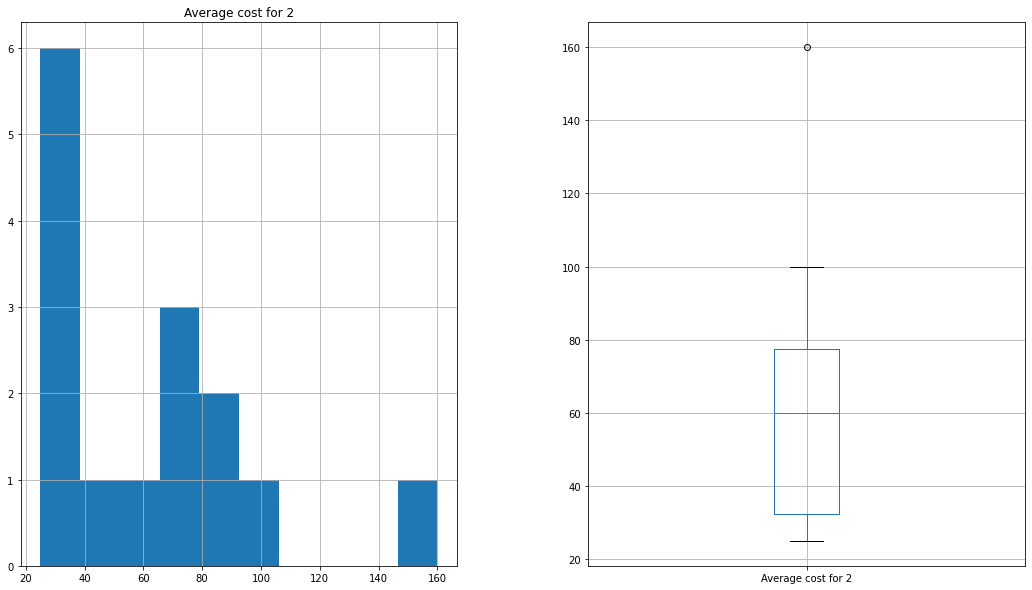

In [399]:
#plotting data 
fig, axs = plt.subplots(1,2,figsize=(18,10))
cbd_res.hist('Average cost for 2',ax=axs[0])
cbd_res.boxplot(column = 'Average cost for 2',ax=axs[1])

In [474]:
#calculating median
cbd_res["Average cost for 2"].median()

50.0

In [446]:
cbd_map = folium.Map([-37.840935, 144.946457], zoom_start=10)
cbd_map

In [475]:
for index, row in cbd_res.iterrows():
    if row['Average cost for 2']<=50:
        folium.Marker([row['Latitude'], row['Longitude']],
                      popup=row['Name']+","+" "+"Rating="+str(row['Rating']),
                      tooltip=row['Location'],
                      icon=folium.Icon(color='green')
                     ).add_to(cbd_map)
    else:
        folium.Marker([row['Latitude'], row['Longitude']],
                      popup=row['Name']+","+" "+"Rating="+str(row['Rating']),
                      tooltip=row['Location'],
                      icon=folium.Icon(color='red')
                     ).add_to(cbd_map)
cbd_map        

In [330]:
out_res = df[df['Distance from CBD']>20]

In [332]:
out_res

,Name,Location,Latitude,Longitude,Average cost for 2,Price range,Rating,Distance from CBD
33,Priya Indian Restaurant,"Stocklands Point Cook, Main Street & Murnong S...",-37.8830404596,144.7346112505,50,3,4.3,21.501522
36,Mehfil,"291 Corrigan Road, Keysborough, Melbourne",-37.9811035203,145.1655691490,50,3,4.3,25.915571
40,Arya Indian Restaurant,"Amberly Park Shopping Centre, Shop 10, 101 See...",-38.0516701414,145.2886885777,70,3,4.3,39.125728
57,BonFire Cafe,"1/27 Springvale Road, Springvale, Melbourne",-37.9354249085,145.1558146253,60,3,3.7,21.835557
62,Bikaner,"52A-B Foster Street, Dandenong, Melbourne",-37.9896560964,145.2108579129,40,2,4.0,29.430295
66,Shavan's Indian Restaurant Patterson Lakes,"Shop 30, Harbour Plaza, Thompson Road, Patters...",-38.0685796645,145.1425360143,70,3,4.1,32.614764
68,Khazana Indian Restaurant,"Knox O-Zone, 425 Burwood Highway, Wantirna, Me...",-37.8695884947,145.2444676682,60,3,4.0,25.611469
79,Clove Chill And Grill,"Taylors Hill Village, 127 Gourlay Road, Taylor...",-37.7112772791,144.7411139309,50,3,4.1,22.483057
81,Utsav,"155 Canterbury Road, Heathmont, Melbourne",-37.8304013127,145.2440043166,50,3,4.2,24.854268
83,Mumbai Curry House,"440 Burwood Highway, Wantirna, Melbourne",-37.8704579316,145.2386241406,55,3,4.1,25.138795


In [426]:
#calculating mean
out_res["Average cost for 2"].mean()

53.125

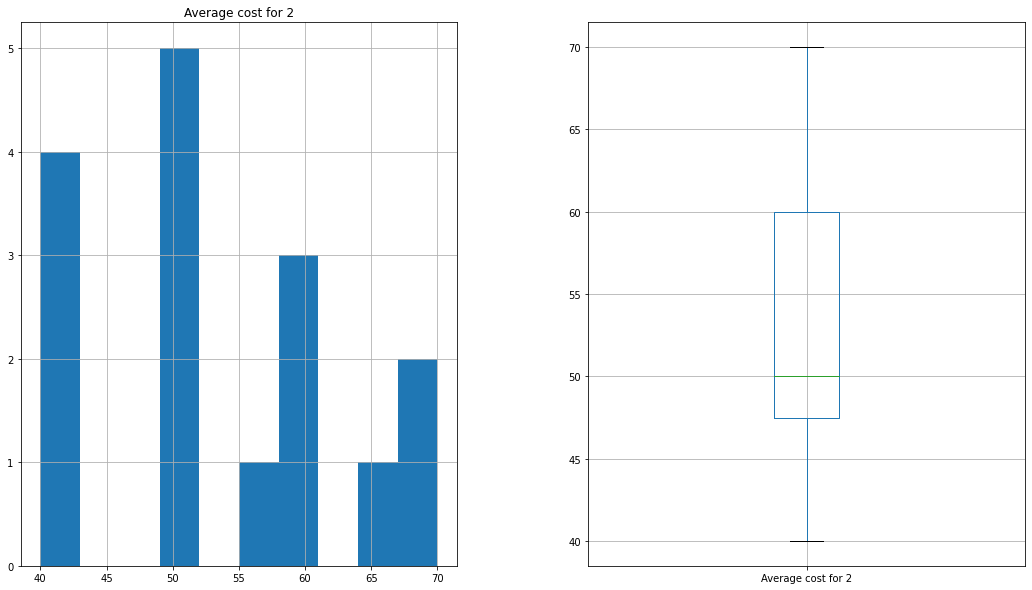

In [445]:
#plotting data
fig, axs = plt.subplots(1,2,figsize=(18,10))
out_res.hist('Average cost for 2',ax=axs[0])
out_res.boxplot(column = 'Average cost for 2',ax=axs[1])

In [462]:
out_map = folium.Map([-37.840935, 144.946457], zoom_start=10)
out_map

In [465]:
for index, row in out_res.iterrows():
    if row['Average cost for 2']<=53.1:
        folium.Marker([row['Latitude'], row['Longitude']],
                      popup=row['Name']+","+" "+"Rating="+str(row['Rating']),
                      tooltip=row['Location'],
                      icon=folium.Icon(color='green')
                     ).add_to(out_map)
    else:
        folium.Marker([row['Latitude'], row['Longitude']],
                      popup=row['Name']+","+" "+"Rating="+str(row['Rating']),
                      tooltip=row['Location'],
                      icon=folium.Icon(color='red')
                     ).add_to(out_map)

out_map